### 算 $H_2$的分子基态能量 使用uccsd方法

In [27]:
from qiskit_nature.second_q.circuit.library import UCCSD,HartreeFock
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.formats import MoleculeInfo
from qiskit_nature.second_q.mappers import JordanWignerMapper, QubitConverter
from qiskit.algorithms import VQE
import qiskit

In [20]:
molecule = MoleculeInfo(
    #["H", "H","H","H"], [(0.0, 0.0, 0.0), (0.0, 0.0, 0.9), (0.0, 0.0, 0.9*2), (0.0, 0.0, 0.9*3)],
    ["H", "H"], [(0.0, 0.0, 0.0), (0.0, 0.0, 1.4),],
    multiplicity=1,  # = 2*spin + 1
    charge=0,
)
driver = PySCFDriver().from_molecule(molecule)
problem = driver.run()
converter = QubitConverter(JordanWignerMapper())

In [21]:
problem.nuclear_repulsion_energy # background part 

0.37798372208571435

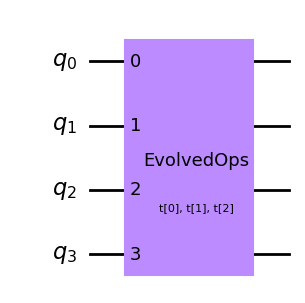

In [22]:
harteefock= HartreeFock(num_particles=problem._num_particles,
                        num_spatial_orbitals=problem.num_spatial_orbitals,
                        qubit_converter=converter)
uccsd =UCCSD(num_spatial_orbitals=problem.num_spatial_orbitals,
             num_particles=problem.num_particles,
             qubit_converter=converter,
             initial_state=harteefock)
uccsd.draw("mpl")

In [23]:
backend = qiskit.BasicAer.get_backend("statevector_simulator")
vqe= VQE(ansatz=uccsd,quantum_instance=backend)

In [24]:
result= vqe.compute_minimum_eigenvalue(converter.convert(problem.hamiltonian.second_q_op()))

In [25]:
result.__dict__

{'_eigenvalue': (-1.3934519691524385+0j),
 '_eigenstate': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  9.49115970e-01-2.93580168e-15j,
         8.14654071e-08+9.81306789e-18j, -2.53448631e-16+1.23512311e-15j,
         0.00000000e+00+0.00000000e+00j, -3.28049632e-08+3.18925051e-17j,
        -3.14926779e-01+8.13800559e-16j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j]),
 '_aux_operator_eigenvalues': None,
 '_optimizer_evals': None,
 '_optimizer_time': 0.1396632194519043,
 '_optimal_value': -1.3934519691524385,
 '_optimal_point': array([-8.14654069e-08,  3.28049631e-08, -3.20379506e-01]),
 '_optimal_parameters': {ParameterVectorElement(t[0]): -8.146540692003211e-08,
  ParameterVectorElement(t[1]): 3.28049630713072

In [ ]:
uccsd.num_parameters

In [28]:
def h2(dist):
    molecule = MoleculeInfo(
    #["H", "H","H","H"], [(0.0, 0.0, 0.0), (0.0, 0.0, 0.9), (0.0, 0.0, 0.9*2), (0.0, 0.0, 0.9*3)],
    ["H", "H"], [(0.0, 0.0, 0.0), (0.0, 0.0,dist),],
    multiplicity=1,  # = 2*spin + 1
    charge=0,
    )
    driver = PySCFDriver().from_molecule(molecule)
    problem = driver.run()
    harteefock= HartreeFock(num_particles=problem._num_particles,
                        num_spatial_orbitals=problem.num_spatial_orbitals,
                        qubit_converter=converter)
    uccsd =UCCSD(num_spatial_orbitals=problem.num_spatial_orbitals,
             num_particles=problem.num_particles,
             qubit_converter=converter,
             initial_state=harteefock)
    backend = qiskit.BasicAer.get_backend("statevector_simulator")
    vqe= VQE(ansatz=uccsd,quantum_instance=backend)
    result = vqe.compute_minimum_eigenvalue(converter.convert(problem.hamiltonian.second_q_op()))
    return result.optimal_value,problem.nuclear_repulsion_energy

In [29]:
import numpy as np
x=[]
for i in np.arange(0.5,4.0,0.2):
    a,b = h2(i)
    x.append(a+b)

In [30]:
x

[-1.0551597944482392,
 -1.1361894540110127,
 -1.1205601297748005,
 -1.0791929449548885,
 -1.0351862637923497,
 -0.9981493525205963,
 -0.9714266884527885,
 -0.9543388539974347,
 -0.9443746796826821,
 -0.9389223672162019,
 -0.936054855899651,
 -0.9345843026025017,
 -0.9338456108336157,
 -0.9334827987104075,
 -0.9333091431375672,
 -0.9332282932942969,
 -0.9331916688459175,
 -0.9331755029997398]

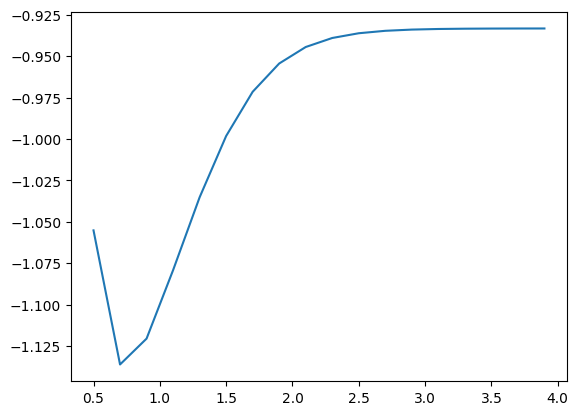

In [31]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(0.5,4.0,0.2),x)